In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import math
import copy
import sys
sys.path.insert(1, "../")

import numpy as np
import gym
import gym_keygrid
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import grakel
import sknetwork
import networkx as nx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from rl_research.utils import trajectory2graph, plot_trajectory, plot_intrinsic_scores

### Generate Trajectories

In [470]:
env = gym.make('keygrid-v0', grid_length=8)

You are using the KeyGridSparse environment with length 8


In [471]:
num_ep = 10
render = False
labels = {s:i for i, s in enumerate(env.states)}
trajectories = []
graphs = []

for n in range(num_ep):
    state = env.reset()
    rewards, actions, states = [], [], []
    score = 0
    t = 0
    done = False
    
    G = nx.DiGraph()
    G.add_node(state)
    G.nodes[state]['label'] = ''.join(map(str, state))

    while not done and t < env._max_episode_steps:        
        action = env.sample_action()
        
        states.append(state)
        actions.append(action)

        state, reward, done, _ = env.step(action)
    
        if state not in states:
            G.add_node(state)
            G.nodes[state]['label'] = ''.join(map(str, state))
            G.add_edge(states[-1], state)
    
        score += reward
                
        if render:
            env.render()

        t += 1
    
    states.append(state)

    graph_info = list(grakel.graph_from_networkx(
        [G], node_labels_tag='label'))[0]
    print(graph_info)
    graph = grakel.Graph(graph_info[0], node_labels=graph_info[1])

    graphs.append(graph)
    trajectories.append(states)

[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {(6, 1): 1.0}, (6, 1): {(7, 1): 1.0, (5, 1): 1.0}, (7, 1): {}, (5, 1): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30', (4, 0): '40', (5, 0): '50', (6, 0): '60', (6, 1): '61', (7, 1): '71', (5, 1): '51'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {(5, 0): 1.0}, (5, 0): {(6, 0): 1.0}, (6, 0): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30', (4, 0): '40', (5, 0): '50', (6, 0): '60'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {(4, 0): 1.0}, (4, 0): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30', (4, 0): '40'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2, 0): 1.0}, (2, 0): {(3, 0): 1.0}, (3, 0): {}}, {(0, 0): '00', (1, 0): '10', (2, 0): '20', (3, 0): '30'}, None]
[{(0, 0): {(1, 0): 1.0}, (1, 0): {(2

In [472]:
# kernel = grakel.WeisfeilerLehman(normalize=True, base_graph_kernel=grakel.ShortestPath)

In [488]:
kernel = grakel.ShortestPath(normalize=True, with_labels=True)

In [500]:
kernel.fit([graphs[0]])

ShortestPath(normalize=True)

In [501]:
kernel.transform(graphs)

ValueError: shapes (10,21) and (44,1) not aligned: 21 (dim 1) != 44 (dim 0)

/Users/utilisateur/opt/anaconda3/lib/python3.7/site-packages/grakel/graph.py:382: UserWarning: overriding existingnode labels for indexes
  warnings.warn('overriding existing' +


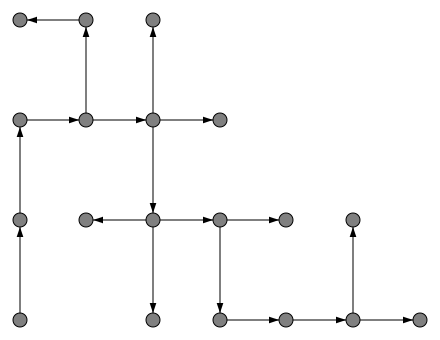

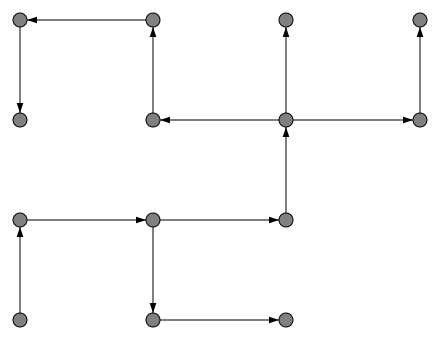

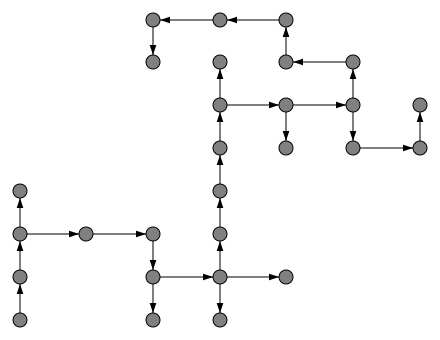

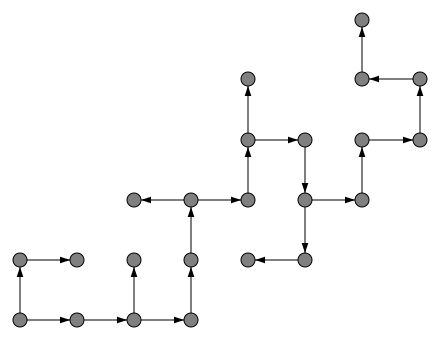

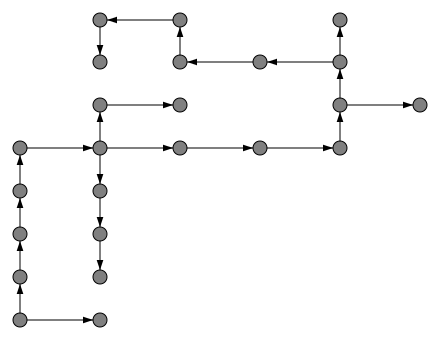

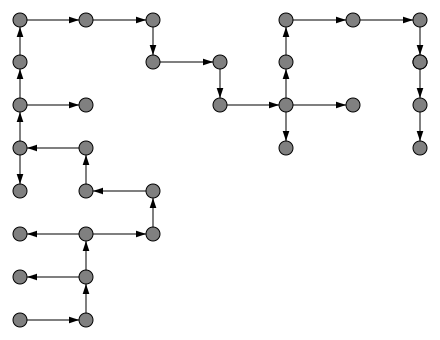

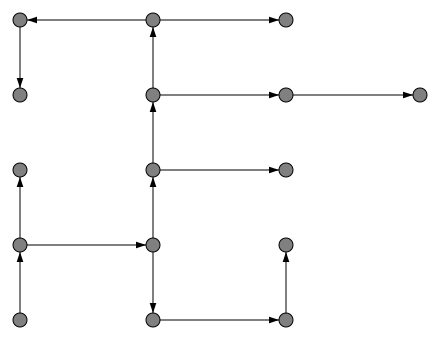

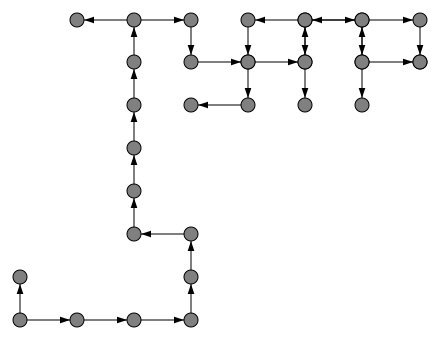

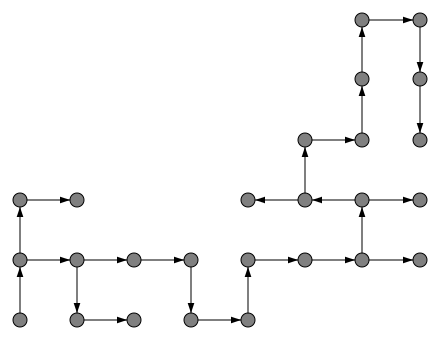

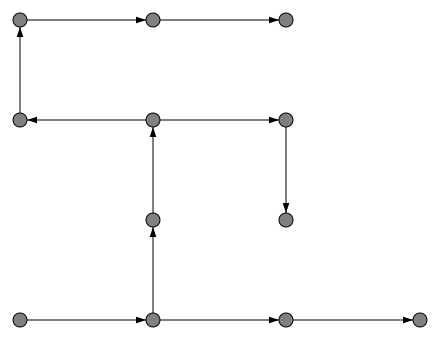

In [451]:
for g in graphs:
    display(plot_trajectory(g))

In [22]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True, base_graph_kernel=grakel.Propagation())

In [90]:
states = trajectories[-1]
graph = graphs[-1]
new_graph = trajectory2graph(states)
display(new_graph.edge_dictionary == graph.edge_dictionary)

(0, 0) (1, 0)
(1, 0) (2, 0)


False

In [648]:
num_ep = 5
render = False
labels = {s:i for i, s in enumerate(env.states)}
graphs = []

for n in range(num_ep):
    state = env.reset()
    rewards, actions, states = [], [], []
    score = 0
    t = 0
    done = False
    
    G = nx.Graph()
    G.add_node(state)
    G.nodes[state]['label'] = state
    
    while not done and t < env._max_episode_steps:        
        action = env.sample_action()
        
        states.append(state)
        actions.append(action)

        state, reward, done, _ = env.step(action)
    
        rewards.append(reward)
        score += reward
        
        G.add_node(state)
        G.nodes[state]['label'] = state
        G.add_edge(states[-1], state)
        
        if render:
            env.render()

        t += 1
    graphs.append(G)
    print(states)

graphs = list(grakel.graph_from_networkx(graphs, node_labels_tag='label'))

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (2, 1), (1, 1), (1, 1), (1, 1), (2, 1), (2, 1)]
[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0)]
[(0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (2, 0), (2, 0), (1, 0), (1, 0), (2, 0), (2, 0), (2, 0), (1, 0), (2, 0), (1, 0)]


In [649]:
grak_graph = []
for g in graphs:
    grak_graph.append(grakel.Graph(g[0], node_labels=g[1]))

In [20]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True, base_graph_kernel=grakel.Propagation())

In [21]:
grak_graph

NameError: name 'grak_graph' is not defined

In [670]:
idx = 2

In [673]:
grak_graph[idx].index_node_labels

{0: (0, 0), 1: (1, 0), 2: (2, 0)}

In [672]:
grak_graph[idx].convert_labels('adjacency')

In [659]:
grak_graph[idx].get_labels()

/Users/utilisateur/opt/anaconda3/lib/python3.7/site-packages/grakel/graph.py:312: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


{0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (2, 0), 4: (2, 1)}

In [661]:
grak_graph[idx].index_node_labels

{0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (2, 0), 4: (2, 1)}

In [456]:
wl_kernel.fit_transform([grak_graph[0]]) 

array([[1.]])

In [459]:
wl_kernel.transform(grak_graph)

array([[1.        ],
       [0.15811388],
       [0.10540926],
       [0.09960238],
       [0.0745356 ],
       [0.12297746],
       [0.11952286],
       [0.14054567],
       [0.06454972],
       [0.1304373 ]])

In [ ]:
sknetwork.visualization.svg_graph()

In [ ]:
wl_kernel = grakel.WeisfeilerLehman(normalize=True)
wl_kernel.fit_transform([g1, g2])

In [191]:
g1 = Graph([('a', 'b', 1.), ('a', 'c', 1.), ('b', 'a', 1.), ('c', 'a', 1.)])

In [192]:
g2 = Graph([('d', 'e', 1.), ('d', 'f', 1.), ('e', 'd', 1.), ('f', 'd', 1.)])

In [193]:
g1.construct_labels()
g2.construct_labels()

In [112]:
env = gym.make('keygrid-v1', grid_length=6)

You are using the KeyGrid2d environment with length 6


In [123]:
from rl_research.algorithms.reinforce_seq_comp import train

L = 2000
logs = True

In [124]:
agent = train(env, L, logs=logs)


****************************************************************************************************
TRAINING START


Iteration:  0
(0, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 0, 1) probas:  [0.19 0.2  0.2  0.2  0.2 ]
(0, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(0, 1, 1) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(0, 2, 0) probas:  [0.19 0.2  0.2  0.2  0.2 ]
(0, 2, 1) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(0, 3, 0) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(0, 3, 1) probas:  [0.18 0.21 0.2  0.2  0.2 ]
(0, 4, 0) probas:  [0.19 0.21 0.2  0.21 0.2 ]
(0, 4, 1) probas:  [0.18 0.21 0.2  0.2  0.2 ]
(0, 5, 0) probas:  [0.19 0.21 0.2  0.21 0.2 ]
(0, 5, 1) probas:  [0.18 0.21 0.2  0.2  0.2 ]
(1, 0, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 0, 1) probas:  [0.19 0.2  0.2  0.2  0.2 ]
(1, 1, 0) probas:  [0.2 0.2 0.2 0.2 0.2]
(1, 1, 1) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(1, 2, 0) probas:  [0.2  0.21 0.2  0.2  0.2 ]
(1, 2, 1) probas:  [0.19 0.21 0.2  0.2  0.2 ]
(1, 3, 0) probas:  [0.19 0.21 0.2  0.21 0.2 ]
(1, 3, 1) pro

bonus:  3.8053113387752955
number of sequences:  25
Score: 0
% of visited states: 56.9%

Iteration:  25
bonus:  4.09689028997449
number of sequences:  26
Score: 0
% of visited states: 56.9%

Iteration:  26
bonus:  6.250450192795738
number of sequences:  27
Score: 20
% of visited states: 61.1%

Iteration:  27
bonus:  4.830111500976626
number of sequences:  28
Score: 0
% of visited states: 61.1%

Iteration:  28
bonus:  3.868548426567041
number of sequences:  29
Score: 0
% of visited states: 61.1%

Iteration:  29
bonus:  3.702071355547417
number of sequences:  30
Score: 0
% of visited states: 61.1%

Iteration:  30
bonus:  3.612701230722577
number of sequences:  31
Score: 0
% of visited states: 61.1%

Iteration:  31
bonus:  3.7335074597895477
number of sequences:  32
Score: 0
% of visited states: 61.1%

Iteration:  32
bonus:  3.510410584476921
number of sequences:  33
Score: 0
% of visited states: 61.1%

Iteration:  33
bonus:  4.669020665578446
number of sequences:  34
Score: 0
% of visite

bonus:  4.775319685702084
number of sequences:  63
Score: 0
% of visited states: 70.8%

Iteration:  63
bonus:  5.025350962225207
number of sequences:  64
Score: 0
% of visited states: 70.8%

Iteration:  64
bonus:  4.4774105416972825
number of sequences:  65
Score: 0
% of visited states: 70.8%

Iteration:  65
bonus:  3.4381297530836195
number of sequences:  66
Score: 0
% of visited states: 70.8%

Iteration:  66
bonus:  3.170249244025886
number of sequences:  67
Score: 0
% of visited states: 70.8%

Iteration:  67
bonus:  4.479616506785915
number of sequences:  68
Score: 0
% of visited states: 70.8%

Iteration:  68
bonus:  3.9130586464689965
number of sequences:  69
Score: 0
% of visited states: 70.8%

Iteration:  69
bonus:  3.868645708854242
number of sequences:  70
Score: 0
% of visited states: 70.8%

Iteration:  70
bonus:  4.139864104731245
number of sequences:  71
Score: 0
% of visited states: 70.8%

Iteration:  71
bonus:  3.5851636391376185
number of sequences:  72
Score: 0
% of visi

(4, 5, 0) probas:  [0.18 0.18 0.22 0.21 0.21]
(4, 5, 1) probas:  [0.18 0.18 0.23 0.21 0.21]
(5, 0, 0) probas:  [0.18 0.18 0.21 0.21 0.21]
(5, 0, 1) probas:  [0.19 0.19 0.21 0.2  0.21]
(5, 1, 0) probas:  [0.18 0.18 0.21 0.21 0.21]
(5, 1, 1) probas:  [0.19 0.19 0.22 0.2  0.21]
(5, 2, 0) probas:  [0.18 0.18 0.22 0.21 0.21]
(5, 2, 1) probas:  [0.19 0.18 0.22 0.2  0.21]
(5, 3, 0) probas:  [0.18 0.18 0.22 0.21 0.21]
(5, 3, 1) probas:  [0.19 0.18 0.23 0.2  0.21]
(5, 4, 0) probas:  [0.18 0.18 0.22 0.21 0.21]
(5, 4, 1) probas:  [0.18 0.18 0.23 0.2  0.2 ]
(5, 5, 0) probas:  [0.18 0.18 0.22 0.21 0.21]
(5, 5, 1) probas:  [0.18 0.18 0.23 0.21 0.2 ]
bonus:  5.229439788427141
number of sequences:  100
Score: 20
% of visited states: 76.4%

Iteration:  101
bonus:  5.046644138068128
number of sequences:  100
Score: 0
% of visited states: 76.4%

Iteration:  102
bonus:  3.079865864090837
number of sequences:  100
Score: 0
% of visited states: 76.4%

Iteration:  103
bonus:  5.30467094800888
number of seque

bonus:  3.5573640493673024
number of sequences:  100
Score: 0
% of visited states: 76.4%

Iteration:  143
bonus:  6.016608405347018
number of sequences:  100
Score: 20
% of visited states: 79.2%

Iteration:  144
bonus:  3.4497750026409135
number of sequences:  100
Score: 0
% of visited states: 79.2%

Iteration:  145
bonus:  4.011530799743386
number of sequences:  100
Score: 0
% of visited states: 79.2%

Iteration:  146
bonus:  5.748246039384853
number of sequences:  100
Score: 0
% of visited states: 79.2%

Iteration:  147
bonus:  7.185790923436244
number of sequences:  100
Score: 20
% of visited states: 80.6%

Iteration:  148
bonus:  4.0173117538291505
number of sequences:  100
Score: 0
% of visited states: 80.6%

Iteration:  149
bonus:  3.7203269693263987
number of sequences:  100
Score: 0
% of visited states: 80.6%

Iteration:  150
bonus:  4.040119466771686
number of sequences:  100
Score: 0
% of visited states: 80.6%

Iteration:  151
bonus:  4.495411636365897
number of sequences:  1

Score: 20
% of visited states: 84.7%

Iteration:  181
bonus:  5.462504753690281
number of sequences:  100
Score: 20
% of visited states: 84.7%

Iteration:  182
bonus:  4.074144703180549
number of sequences:  100
Score: 0
% of visited states: 84.7%

Iteration:  183
bonus:  4.23615189289184
number of sequences:  100
Score: 0
% of visited states: 84.7%

Iteration:  184
bonus:  6.488427872899218
number of sequences:  100
Score: 20
% of visited states: 84.7%

Iteration:  185
bonus:  4.27647885484313
number of sequences:  100
Score: 0
% of visited states: 84.7%

Iteration:  186
bonus:  4.529752496978977
number of sequences:  100
Score: 20
% of visited states: 84.7%

Iteration:  187
bonus:  3.82036163423595
number of sequences:  100
Score: 0
% of visited states: 84.7%

Iteration:  188
bonus:  4.563426729012539
number of sequences:  100
Score: 0
% of visited states: 84.7%

Iteration:  189
bonus:  4.970351046141275
number of sequences:  100
Score: 0
% of visited states: 84.7%

Iteration:  190
b

bonus:  6.23237631943685
number of sequences:  100
Score: 20
% of visited states: 90.3%

Iteration:  221
bonus:  3.2929246739020512
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  222
bonus:  5.030515694283647
number of sequences:  100
Score: 20
% of visited states: 90.3%

Iteration:  223
bonus:  5.051693421965929
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  224
bonus:  5.065949494061246
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  225
bonus:  4.659116592677764
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  226
bonus:  4.294210628679366
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  227
bonus:  6.12779349467489
number of sequences:  100
Score: 20
% of visited states: 90.3%

Iteration:  228
bonus:  3.5974433632867564
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  229
bonus:  4.894468887464174
number of sequences:  100


bonus:  5.09470261863818
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  262
bonus:  4.204804937798735
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  263
bonus:  4.90255003066504
number of sequences:  100
Score: 20
% of visited states: 90.3%

Iteration:  264
bonus:  4.698138061297582
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  265
bonus:  5.39574436654793
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  266
bonus:  4.505043724117251
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  267
bonus:  4.883770858923845
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  268
bonus:  5.24351823489886
number of sequences:  100
Score: 0
% of visited states: 90.3%

Iteration:  269
bonus:  6.5007696492711995
number of sequences:  100
Score: 20
% of visited states: 90.3%

Iteration:  270
bonus:  4.506410119617892
number of sequences:  100
Scor

bonus:  6.087400023168669
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  301
bonus:  4.828097479090646
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  302
bonus:  5.319477128201217
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  303
bonus:  5.429718599618455
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  304
bonus:  5.490410334237662
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  305
bonus:  5.102606292648787
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  306
bonus:  5.045124786733796
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  307
bonus:  5.059167319107938
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  308
bonus:  5.9993185379361735
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  309
bonus:  6.491319307121177
number of sequences:  10

bonus:  3.7599588276240112
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  341
bonus:  3.9563531061310178
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  342
bonus:  4.256386858011196
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  343
bonus:  5.5732687913748284
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  344
bonus:  4.475902880082029
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  345
bonus:  4.077881831197823
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  346
bonus:  5.122466587216891
number of sequences:  100
Score: 20
% of visited states: 91.7%

Iteration:  347
bonus:  4.430858923058695
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  348
bonus:  4.154239317500682
number of sequences:  100
Score: 0
% of visited states: 91.7%

Iteration:  349
bonus:  6.219942868767428
number of sequences:  1

bonus:  4.727301833511365
number of sequences:  100
Score: 20
% of visited states: 94.4%

Iteration:  382
bonus:  4.435564963621509
number of sequences:  100
Score: 20
% of visited states: 94.4%

Iteration:  383
bonus:  5.542576970822309
number of sequences:  100
Score: 20
% of visited states: 94.4%

Iteration:  384
bonus:  5.6607464255129285
number of sequences:  100
Score: 0
% of visited states: 94.4%

Iteration:  385
bonus:  5.111746103426466
number of sequences:  100
Score: 20
% of visited states: 94.4%

Iteration:  386
bonus:  5.1839676709199125
number of sequences:  100
Score: 20
% of visited states: 94.4%

Iteration:  387
bonus:  7.6118910967784155
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  388
bonus:  4.994686171251189
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  389
bonus:  4.812183377348035
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  390
bonus:  4.010384098802158
number of sequences:

bonus:  5.364825515440356
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  421
bonus:  7.237186683542466
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  422
bonus:  5.489110997363563
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  423
bonus:  5.118708941471465
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  424
bonus:  7.749362834101583
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  425
bonus:  4.953554819263742
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  426
bonus:  4.537951440024559
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  427
bonus:  3.908953488377232
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  428
bonus:  4.3489122456221825
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  429
bonus:  4.667711129000713
number of sequences:  10

(1, 5, 1) probas:  [0.1  0.12 0.28 0.22 0.29]
(2, 0, 0) probas:  [0.13 0.12 0.23 0.24 0.27]
(2, 0, 1) probas:  [0.11 0.12 0.24 0.25 0.28]
(2, 1, 0) probas:  [0.12 0.12 0.24 0.24 0.28]
(2, 1, 1) probas:  [0.11 0.12 0.25 0.24 0.28]
(2, 2, 0) probas:  [0.12 0.12 0.25 0.23 0.29]
(2, 2, 1) probas:  [0.11 0.12 0.25 0.24 0.28]
(2, 3, 0) probas:  [0.11 0.12 0.26 0.22 0.29]
(2, 3, 1) probas:  [0.1  0.12 0.26 0.24 0.28]
(2, 4, 0) probas:  [0.1  0.12 0.27 0.21 0.29]
(2, 4, 1) probas:  [0.1  0.12 0.27 0.23 0.28]
(2, 5, 0) probas:  [0.1  0.12 0.28 0.21 0.29]
(2, 5, 1) probas:  [0.1  0.12 0.27 0.22 0.29]
(3, 0, 0) probas:  [0.12 0.12 0.23 0.25 0.28]
(3, 0, 1) probas:  [0.11 0.12 0.24 0.25 0.28]
(3, 1, 0) probas:  [0.12 0.11 0.24 0.24 0.29]
(3, 1, 1) probas:  [0.11 0.12 0.25 0.24 0.28]
(3, 2, 0) probas:  [0.12 0.11 0.24 0.23 0.3 ]
(3, 2, 1) probas:  [0.11 0.12 0.25 0.24 0.28]
(3, 3, 0) probas:  [0.11 0.11 0.25 0.22 0.3 ]
(3, 3, 1) probas:  [0.1  0.11 0.26 0.24 0.29]
(3, 4, 0) probas:  [0.1  0.12 0.26

bonus:  4.910310291151266
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  486
bonus:  4.337789148032925
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  487
bonus:  4.514544866169478
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  488
bonus:  5.367451262181694
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  489
bonus:  5.222141551854914
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  490
bonus:  5.2142774118641695
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  491
bonus:  4.978389123128501
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  492
bonus:  5.105099613450375
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  493
bonus:  3.985188275006913
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  494
bonus:  4.550396990192023
number of sequences:  100


bonus:  5.195089269482929
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  522
bonus:  4.311629858406983
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  523
bonus:  3.710221274803478
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  524
bonus:  4.617121445679627
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  525
bonus:  5.9528876013495
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  526
bonus:  5.7415431768176965
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  527
bonus:  5.064642027113175
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  528
bonus:  5.273998904259603
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  529
bonus:  4.808924668213711
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  530
bonus:  4.819918364504296
number of sequences:  100
S

bonus:  5.192617558808458
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  562
bonus:  5.99435864523359
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  563
bonus:  5.7065506161175605
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  564
bonus:  5.172225092260094
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  565
bonus:  5.6466494271693595
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  566
bonus:  5.51877775344397
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  567
bonus:  6.178877275279545
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  568
bonus:  4.967355379322445
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  569
bonus:  4.641083067792173
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  570
bonus:  5.743688032815471
number of sequences:  10

bonus:  5.399849348255377
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  601
bonus:  4.494921375855082
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  602
bonus:  5.802563372063763
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  603
bonus:  3.599578277055269
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  604
bonus:  4.776246998714153
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  605
bonus:  3.8428166073683916
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  606
bonus:  3.9600192720896104
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  607
bonus:  4.557727124387596
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  608
bonus:  4.480050114274115
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  609
bonus:  5.23301632965172
number of sequences:  100


bonus:  4.558776597759788
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  643
bonus:  5.4160282040703684
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  644
bonus:  4.635643415942214
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  645
bonus:  6.836856598188695
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  646
bonus:  6.457124185806263
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  647
bonus:  5.891096623187444
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  648
bonus:  5.476338219689479
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  649
bonus:  5.641850063644365
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  650
bonus:  5.432571375892595
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  651
bonus:  4.736695295336507
number of sequences:  


Iteration:  681
bonus:  4.053587043193295
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  682
bonus:  3.678243543426467
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  683
bonus:  3.656059664529731
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  684
bonus:  4.21505531407614
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  685
bonus:  3.86721467812974
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  686
bonus:  4.296933774014413
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  687
bonus:  4.536010462643713
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  688
bonus:  5.400302918535505
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  689
bonus:  4.262599314517472
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  690
bonus:  4.768741900624715
number o

bonus:  4.360762150515847
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  721
bonus:  5.175809551278164
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  722
bonus:  4.965752583066154
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  723
bonus:  5.06567707235687
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  724
bonus:  4.954492257884296
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  725
bonus:  4.60673650127288
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  726
bonus:  6.734688853220401
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  727
bonus:  4.457477173781334
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  728
bonus:  4.678300473247106
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  729
bonus:  3.956937934182999
number of sequences:  100
Sco

Score: 0
% of visited states: 95.8%

Iteration:  761
bonus:  4.001773698119979
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  762
bonus:  3.537871713683413
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  763
bonus:  7.064529683453283
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  764
bonus:  4.26756555361263
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  765
bonus:  4.927092372168648
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  766
bonus:  4.440000330354874
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  767
bonus:  4.217404187915525
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  768
bonus:  5.665873909839207
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  769
bonus:  4.6109265880271115
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  770

bonus:  4.549555065979253
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  801
bonus:  4.670759958010502
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  802
bonus:  4.547308036956276
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  803
bonus:  5.519855567511602
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  804
bonus:  5.127785447831987
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  805
bonus:  4.931197663941727
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  806
bonus:  3.2443481921073674
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  807
bonus:  4.618527329792303
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  808
bonus:  8.22720387265226
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  809
bonus:  3.6059968697472895
number of sequences:  10

bonus:  4.928873796023885
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  841
bonus:  4.0778928635171
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  842
bonus:  5.612571595522287
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  843
bonus:  4.908256517356442
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  844
bonus:  4.774488581721068
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  845
bonus:  4.523880388346135
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  846
bonus:  4.817118137131832
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  847
bonus:  7.197977565244128
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  848
bonus:  5.170127768838054
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  849
bonus:  4.030633382039181
number of sequences:  100

bonus:  4.766307477285277
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  881
bonus:  5.201023163395949
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  882
bonus:  4.7504960379092145
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  883
bonus:  4.819175206070013
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  884
bonus:  5.117335341583308
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  885
bonus:  4.102390998216753
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  886
bonus:  5.395535627156964
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  887
bonus:  4.363581734282893
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  888
bonus:  4.54821733703471
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  889
bonus:  3.6187978864099977
number of sequences:  100
S


Iteration:  921
bonus:  5.142677528009346
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  922
bonus:  6.363161013697175
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  923
bonus:  4.939432844644195
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  924
bonus:  4.5549619664098895
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  925
bonus:  4.660229531601585
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  926
bonus:  4.079479644244321
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  927
bonus:  4.260195128605177
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  928
bonus:  4.537110340200997
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  929
bonus:  10.409909786024977
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  930
bonus:  9.016472544589211
number

bonus:  4.394738407917581
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  964
bonus:  4.82390289305962
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  965
bonus:  4.818847962072096
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  966
bonus:  5.41711837211067
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  967
bonus:  4.159682690103484
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  968
bonus:  5.070282089008036
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  969
bonus:  6.163631574955641
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  970
bonus:  4.850487330444412
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  971
bonus:  4.728087284502788
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  972
bonus:  5.079302225423062
number of sequences:  100
S

Score: 20
% of visited states: 95.8%

Iteration:  1003
bonus:  6.62823338155204
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  1004
bonus:  4.619668570566357
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  1005
bonus:  3.960314550452534
number of sequences:  100
Score: 20
% of visited states: 95.8%

Iteration:  1006
bonus:  5.787850905758429
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  1007
bonus:  5.164447814099076
number of sequences:  100
Score: 0
% of visited states: 95.8%

Iteration:  1008
bonus:  5.667890365749714
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1009
bonus:  4.066778496160753
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1010
bonus:  5.590560041000984
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1011
bonus:  4.418746889377983
number of sequences:  100
Score: 20
% of visited states: 97.2%

Itera

bonus:  4.512082056109194
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1042
bonus:  5.054495981860419
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1043
bonus:  5.108776770040868
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1044
bonus:  5.415006401059543
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1045
bonus:  5.054409852927303
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1046
bonus:  5.780990214506742
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1047
bonus:  5.194898073435681
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1048
bonus:  3.89710095460202
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1049
bonus:  5.623501703434826
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1050
bonus:  4.645153838134715
number of sequenc

bonus:  5.435311639760207
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1082
bonus:  5.377060789753301
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1083
bonus:  4.586310411123593
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1084
bonus:  5.792598267719588
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1085
bonus:  5.148544114420048
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1086
bonus:  4.7523038793838985
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1087
bonus:  5.172175374690881
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1088
bonus:  5.226239103333134
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1089
bonus:  4.858220918345481
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1090
bonus:  6.897087983912366
number of sequen

bonus:  6.141088697561707
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1123
bonus:  4.5032125247245025
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1124
bonus:  4.929460705106318
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1125
bonus:  5.298855838545933
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1126
bonus:  6.165562505770606
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1127
bonus:  6.069686034284753
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1128
bonus:  3.9837255967760017
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1129
bonus:  3.150109111438372
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1130
bonus:  5.1420000505107755
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1131
bonus:  5.851256609906236
number of seq

bonus:  7.727353446205422
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1163
bonus:  4.7481952434642185
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1164
bonus:  5.024121919755659
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1165
bonus:  6.298557141950729
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1166
bonus:  4.917739121212506
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1167
bonus:  5.107565704497798
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1168
bonus:  4.456105738833945
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1169
bonus:  4.45950845124625
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1170
bonus:  3.5061135831713286
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1171
bonus:  5.197943486832209
number of s

bonus:  4.018693950565945
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1201
bonus:  4.144158544354008
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1202
bonus:  3.8362422903971045
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1203
bonus:  4.449968524711256
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1204
bonus:  4.587355081117745
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1205
bonus:  4.896240307541302
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1206
bonus:  3.164774759238943
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1207
bonus:  5.031629222005867
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1208
bonus:  4.289296574665967
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1209
bonus:  5.5964317224866855
number of s

(4, 2, 0) probas:  [0.11 0.08 0.22 0.21 0.39]
(4, 2, 1) probas:  [0.1  0.08 0.33 0.18 0.32]
(4, 3, 0) probas:  [0.11 0.08 0.23 0.18 0.4 ]
(4, 3, 1) probas:  [0.09 0.08 0.34 0.16 0.32]
(4, 4, 0) probas:  [0.1  0.08 0.25 0.15 0.42]
(4, 4, 1) probas:  [0.09 0.07 0.36 0.15 0.33]
(4, 5, 0) probas:  [0.09 0.08 0.27 0.14 0.42]
(4, 5, 1) probas:  [0.08 0.07 0.38 0.13 0.33]
(5, 0, 0) probas:  [0.11 0.08 0.2  0.25 0.37]
(5, 0, 1) probas:  [0.1  0.08 0.27 0.21 0.33]
(5, 1, 0) probas:  [0.11 0.08 0.2  0.23 0.38]
(5, 1, 1) probas:  [0.1  0.08 0.29 0.19 0.34]
(5, 2, 0) probas:  [0.11 0.08 0.2  0.21 0.4 ]
(5, 2, 1) probas:  [0.1  0.08 0.31 0.18 0.34]
(5, 3, 0) probas:  [0.11 0.08 0.21 0.18 0.42]
(5, 3, 1) probas:  [0.1  0.07 0.32 0.16 0.34]
(5, 4, 0) probas:  [0.1  0.08 0.22 0.16 0.44]
(5, 4, 1) probas:  [0.09 0.07 0.34 0.15 0.35]
(5, 5, 0) probas:  [0.1  0.08 0.24 0.14 0.45]
(5, 5, 1) probas:  [0.09 0.07 0.36 0.13 0.35]
bonus:  4.187283064089382
number of sequences:  100
Score: 20
% of visited state

bonus:  5.681486940312802
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1279
bonus:  6.268994257732272
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1280
(0, 0, 0) probas:  [0.12 0.09 0.27 0.23 0.29]
(0, 0, 1) probas:  [0.1  0.09 0.32 0.2  0.29]
(0, 1, 0) probas:  [0.11 0.09 0.3  0.2  0.29]
(0, 1, 1) probas:  [0.1  0.09 0.34 0.18 0.29]
(0, 2, 0) probas:  [0.1  0.09 0.32 0.18 0.3 ]
(0, 2, 1) probas:  [0.09 0.09 0.36 0.17 0.29]
(0, 3, 0) probas:  [0.1  0.1  0.34 0.16 0.3 ]
(0, 3, 1) probas:  [0.09 0.09 0.38 0.15 0.29]
(0, 4, 0) probas:  [0.09 0.1  0.36 0.15 0.3 ]
(0, 4, 1) probas:  [0.09 0.09 0.39 0.14 0.29]
(0, 5, 0) probas:  [0.09 0.1  0.38 0.13 0.31]
(0, 5, 1) probas:  [0.08 0.09 0.41 0.12 0.29]
(1, 0, 0) probas:  [0.12 0.09 0.25 0.24 0.31]
(1, 0, 1) probas:  [0.1  0.09 0.32 0.2  0.29]
(1, 1, 0) probas:  [0.11 0.09 0.27 0.21 0.32]
(1, 1, 1) probas:  [0.1  0.09 0.34 0.18 0.3 ]
(1, 2, 0) probas:  [0.11 0.09 0.29 0.18 0.32]
(1, 2

Score: 0
% of visited states: 97.2%

Iteration:  1301
bonus:  4.77981089003511
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1302
bonus:  4.72912372966354
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1303
bonus:  5.547590822403722
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1304
bonus:  3.939467569465359
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1305
bonus:  6.376667022726016
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1306
bonus:  4.402968226962211
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1307
bonus:  4.0300811366712095
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1308
bonus:  4.021119120838378
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1309
bonus:  6.210076088403821
number of sequences:  100
Score: 20
% of visited states: 97.2%

Ite

(5, 5, 0) probas:  [0.13 0.08 0.21 0.14 0.43]
(5, 5, 1) probas:  [0.12 0.08 0.3  0.13 0.37]
bonus:  5.092332419883566
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1341
bonus:  4.162629649960749
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1342
bonus:  4.5117138010367315
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1343
bonus:  4.365676132877412
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1344
bonus:  5.931837338466064
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1345
bonus:  3.6714178457798865
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1346
bonus:  3.6193449185441073
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1347
bonus:  4.745993677427885
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1348
bonus:  4.791339078223893
number of sequences:  100

bonus:  5.304378483464903
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1381
bonus:  5.956181714866359
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1382
bonus:  4.65421839059627
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1383
bonus:  4.404313450415398
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1384
bonus:  6.068764808884867
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1385
bonus:  4.779523424898774
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1386
bonus:  4.50691964799433
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1387
bonus:  4.8856205213653405
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1388
bonus:  4.067768741041927
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1389
bonus:  5.013912846312528
number of seque

bonus:  5.939769891545494
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1423
bonus:  4.320852299498791
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1424
bonus:  4.778187672761071
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1425
bonus:  4.4962657998620355
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1426
bonus:  4.6256170999476
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1427
bonus:  6.785819534889098
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1428
bonus:  5.386274620376602
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1429
bonus:  5.061896048730808
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1430
bonus:  5.647379631832808
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1431
bonus:  5.765858850213979
number of sequen

bonus:  3.574051385377099
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1461
bonus:  4.003771436795922
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1462
bonus:  3.935391175226223
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1463
bonus:  5.51277663053422
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1464
bonus:  4.398054018590683
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1465
bonus:  5.139380045557829
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1466
bonus:  5.014336987097256
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1467
bonus:  5.313338873504103
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1468
bonus:  4.492612203595396
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1469
bonus:  3.3050849978870054
number of sequenc

bonus:  4.542907142538126
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1501
bonus:  5.635716526509505
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1502
bonus:  6.171875760365289
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1503
bonus:  4.588855725434558
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1504
bonus:  5.471852750267943
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1505
bonus:  4.978453401295761
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1506
bonus:  4.394843969820565
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1507
bonus:  4.514807549799546
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1508
bonus:  4.92632865403729
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1509
bonus:  4.9377728711118065
number of sequenc

Score: 0
% of visited states: 97.2%

Iteration:  1542
bonus:  4.502354425838568
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1543
bonus:  3.734982790443799
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1544
bonus:  4.989495651054865
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1545
bonus:  4.330811929355882
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1546
bonus:  4.159620281474639
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1547
bonus:  5.458494390231597
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1548
bonus:  5.080852545764564
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1549
bonus:  3.8089955459760154
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1550
bonus:  4.285957445776174
number of sequences:  100
Score: 0
% of visited states: 97.2%

Itera

bonus:  6.138928246463465
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1582
bonus:  4.257324052637351
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1583
bonus:  4.245616405157243
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1584
bonus:  4.262041808346191
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1585
bonus:  4.425739512444307
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1586
bonus:  4.560959242471117
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1587
bonus:  4.1253924440430305
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1588
bonus:  5.65971879592354
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1589
bonus:  3.803258187851903
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1590
bonus:  4.8053205403449715
number of seque

bonus:  4.049603783995367
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1621
bonus:  4.197346087927237
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1622
bonus:  5.239917424113664
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1623
bonus:  4.800078679609527
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1624
bonus:  3.7150048276277143
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1625
bonus:  5.2498147189151565
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1626
bonus:  5.74582223533471
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1627
bonus:  4.302501689445848
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1628
bonus:  4.895467360707529
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1629
bonus:  5.738768643756725
number of seque


Iteration:  1663
bonus:  6.814138968036861
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1664
bonus:  4.9401862885666725
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1665
bonus:  5.274663338394687
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1666
bonus:  5.344619229609573
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1667
bonus:  4.732282137763396
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1668
bonus:  5.029381838359243
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1669
bonus:  3.609827620891663
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1670
bonus:  6.117963270610352
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1671
bonus:  4.345054690236476
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1672
bonus:  3.70377722221982


bonus:  4.361482656430012
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1703
bonus:  4.594765895260869
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1704
bonus:  4.347835534273233
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1705
bonus:  3.7362568868232273
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1706
bonus:  6.0493373733468685
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1707
bonus:  4.414872846190667
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1708
bonus:  3.3579134986503503
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1709
bonus:  4.121237896082688
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1710
bonus:  3.769485831906048
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1711
bonus:  4.476632028623444
number of sequ

bonus:  4.808391220902399
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1741
bonus:  4.773494683437421
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1742
bonus:  3.6012445193369853
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1743
bonus:  3.420305475048788
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1744
bonus:  5.182020291152165
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1745
bonus:  4.7587081915167255
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1746
bonus:  4.161102550749247
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1747
bonus:  3.680866993437544
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1748
bonus:  3.812957212121472
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1749
bonus:  4.204285516981201
number of sequen

Score: 0
% of visited states: 97.2%

Iteration:  1783
bonus:  5.254648112321918
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1784
bonus:  4.710621045028011
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1785
bonus:  5.958693248865627
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1786
bonus:  6.46981296221515
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1787
bonus:  4.17219592097479
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1788
bonus:  6.260232374545904
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1789
bonus:  5.152500850387306
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1790
bonus:  4.5213058017940035
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1791
bonus:  4.2317821089658505
number of sequences:  100
Score: 20
% of visited states: 97.2%

Itera

bonus:  5.320318844625589
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1821
bonus:  4.259961226302018
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1822
bonus:  4.077993696792815
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1823
bonus:  3.826635677496719
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1824
bonus:  5.530521075424468
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1825
bonus:  4.497490796265683
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1826
bonus:  5.10047029748756
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1827
bonus:  5.334322088998559
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1828
bonus:  3.4211457795564484
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1829
bonus:  4.928828080572295
number of seq

bonus:  6.786998505674136
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1862
bonus:  4.571572716965387
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1863
bonus:  3.930072640032845
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1864
bonus:  3.611883092578657
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1865
bonus:  3.596754454379324
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1866
bonus:  3.805655520107161
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1867
bonus:  4.588016647673537
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1868
bonus:  3.7484234775827274
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1869
bonus:  3.9762440907557792
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1870
bonus:  3.271607637914637
number of seq

bonus:  4.8578422909211625
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1902
bonus:  5.050203511579163
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1903
bonus:  4.480537232440413
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1904
bonus:  3.4755263885576406
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1905
bonus:  4.083761974454341
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1906
bonus:  4.506553198303119
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1907
bonus:  4.222581177342667
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1908
bonus:  4.38413440366348
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1909
bonus:  4.366531406457795
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1910
bonus:  3.197994196131041
number of sequ

bonus:  4.360181991230958
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1941
bonus:  4.313584773551649
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1942
bonus:  4.392779749874137
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1943
bonus:  7.524125958764176
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1944
bonus:  4.051845115755967
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1945
bonus:  4.0682283963256385
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1946
bonus:  4.840486854127051
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1947
bonus:  4.460397228941175
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1948
bonus:  4.023053657782935
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1949
bonus:  4.295560464308628
number of seque

bonus:  5.029134756945626
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1981
bonus:  3.9764958793931684
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1982
bonus:  4.692624214390663
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1983
bonus:  4.062177281024637
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1984
bonus:  5.61521228857522
number of sequences:  100
Score: 20
% of visited states: 97.2%

Iteration:  1985
bonus:  4.107921711602282
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1986
bonus:  4.681685553639297
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1987
bonus:  4.483525738179529
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1988
bonus:  3.907405813452499
number of sequences:  100
Score: 0
% of visited states: 97.2%

Iteration:  1989
bonus:  4.478659180697444
number of sequenc

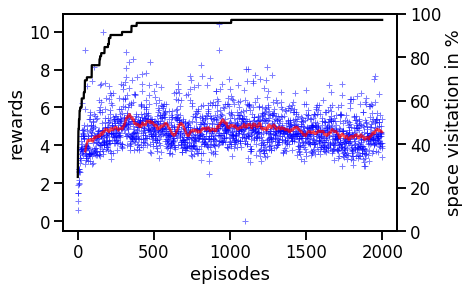

In [125]:
plot_intrinsic_scores(agent.intrinsic_scores, space_visitation=agent.space_visitation)

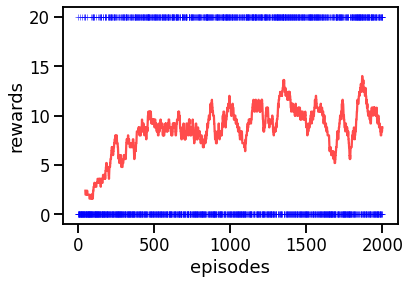

In [126]:
plot_intrinsic_scores(agent.scores)

In [30]:
G1 = nx.DiGraph()
G1.add_nodes_from([0, 1, 2])
G1.nodes[0]['label'] = 'a'
G1.nodes[1]['label'] = 'b'
G1.nodes[2]['label'] = 'c'
G1.add_edge(0, 1)
G1.add_edge(1, 2)

G2 = nx.DiGraph()
G2.add_nodes_from([0, 1, 2])
G2.nodes[0]['label'] = 'e'
G2.nodes[1]['label'] = 'f'
G2.nodes[2]['label'] = 'g'
G2.add_edge(0, 1)
G2.add_edge(1, 2)

graph_kernel = grakel.WeisfeilerLehman(normalize=True)

graphs = list(grakel.graph_from_networkx([G1, G2], node_labels_tag='label'))
graph_kernel.fit([graphs[0]])

WeisfeilerLehman(normalize=True)

In [31]:
graph_kernel.transform([graphs[1]])

array([[0.]])